## Decision Tree DATASET1

In [5]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer

In [6]:
#Loading Dataset
df = pd.read_csv("project3_dataset1.txt",sep='\t',header=None)
features_column  = df.iloc[: , :30]
X = features_column
y = df[30]

In [7]:
#Model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)
accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy_score(y_test, y_pred))
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
clf_report

Accuracy:  0.9298245614035088


,0,1,accuracy,macro avg,weighted avg
precision,0.980392,0.855072,0.929825,0.917732,0.935687
recall,0.909091,0.967213,0.929825,0.938152,0.929825
f1-score,0.943396,0.907692,0.929825,0.925544,0.930660
support,110.000000,61.000000,0.929825,171.000000,171.000000


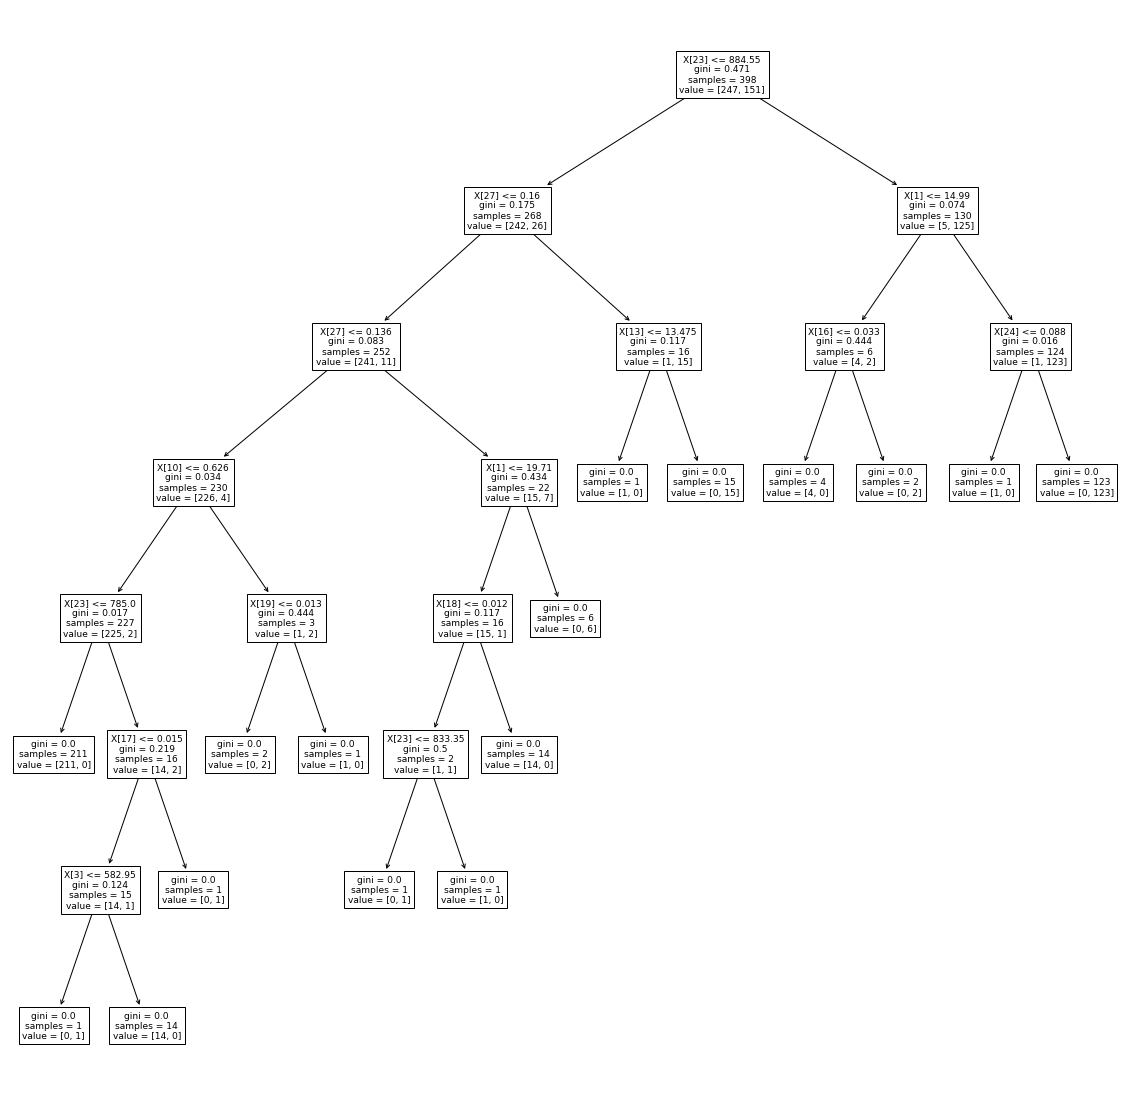

In [8]:
#Model plotting
plt.figure(figsize=(20,20))
tree.plot_tree(clf1)
plt.show()

## Hyperparameter Decision Tree DATASET1

In [10]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [2, 3, 5, 7, 9],
    'criterion': ["gini", "entropy"],
    'min_samples_split': [2, 3, 5, 7, 9]
}

scoring = ['accuracy','f1_macro','roc_auc', 'average_precision','recall' ]
grid_search = GridSearchCV(estimator=clf1, param_grid=params, cv=10, n_jobs=-1, scoring = scoring, verbose=3, refit='accuracy', return_train_score=True)

# grid_search = GridSearchCV(estimator=clf, param_grid=params, cv=10, n_jobs=-1, verbose=3, scoring = "accuracy")
grid_search.fit(X_train, y_train)
grid_pred = grid_search.predict(X_test)
score = roc_auc_score(y_test, grid_pred)

print(grid_search.best_estimator_)
print(grid_search.best_params_)
print("Accuracy ", grid_search.score(X_test, y_test))
print(classification_report(y_test, grid_pred))

print(f"ROC AUC: {score:.4f}")

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
[CV 1/10] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2; accuracy: (train=0.961, test=0.850) average_precision: (train=0.940, test=0.765) f1_macro: (train=0.958, test=0.848) recall: (train=0.956, test=0.938) roc_auc: (train=0.971, test=0.883) total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5; accuracy: (train=0.961, test=0.850) average_precision: (train=0.940, test=0.765) f1_macro: (train=0.958, test=0.848) recall: (train=0.956, test=0.938) roc_auc: (train=0.971, test=0.883) total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5; accuracy: (train=0.964, test=0.950) average_precision: (train=0.949, test=0.917) f1_macro: (train=0.961, test=0.945) recall: (train=0.919, test=0.867) roc_auc: (train=0.963, test=0.933) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, min_samples_leaf=2, min_s

Text(0, 0.5, 'standard deviation')

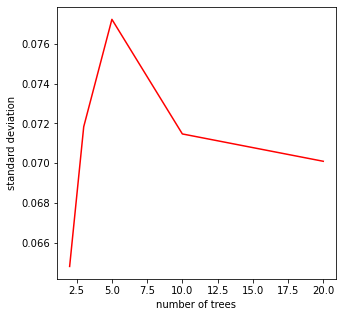

In [23]:
grid_search.cv_results_
x=pd.DataFrame(grid_search.cv_results_).groupby(['param_max_depth']).mean().index
y=pd.DataFrame(grid_search.cv_results_).groupby(['param_max_depth']).mean()['mean_test_accuracy']
z=pd.DataFrame(grid_search.cv_results_).groupby(['param_max_depth']).mean()['mean_train_accuracy']
v=pd.DataFrame(grid_search.cv_results_).groupby(['param_max_depth']).mean()['std_test_accuracy']

plt.figure(figsize=(5,5))
plt.axes().plot(x,v,color='red')
plt.xlabel("number of trees")
plt.ylabel("standard deviation")


## 10-Fold Cross Validation Decision Tree DATASET1

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
    
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('\nList of possible accuracy:', scores)
print('\nMaximum Accuracy That can be obtained from this model is:', max(scores)*100, '%')
print('\nMinimum Accuracy:', min(scores)*100, '%')
print('\nOverall Accuracy:', (np.mean(scores)*100, '%'))
print('\nStandard Deviation is:', np.std(scores))
      

Fold:  1, Training/Test Split Distribution: [223 135], Accuracy: 0.900
Fold:  2, Training/Test Split Distribution: [222 136], Accuracy: 0.950
Fold:  3, Training/Test Split Distribution: [222 136], Accuracy: 0.975
Fold:  4, Training/Test Split Distribution: [222 136], Accuracy: 0.875
Fold:  5, Training/Test Split Distribution: [222 136], Accuracy: 0.975
Fold:  6, Training/Test Split Distribution: [222 136], Accuracy: 0.900
Fold:  7, Training/Test Split Distribution: [222 136], Accuracy: 0.925
Fold:  8, Training/Test Split Distribution: [222 136], Accuracy: 0.925
Fold:  9, Training/Test Split Distribution: [223 136], Accuracy: 0.872
Fold: 10, Training/Test Split Distribution: [223 136], Accuracy: 0.949


Cross-Validation accuracy: 0.925 +/- 0.036

List of possible accuracy: [0.9, 0.95, 0.975, 0.875, 0.975, 0.9, 0.925, 0.925, 0.8717948717948718, 0.9487179487179487]

Maximum Accuracy That can be obtained from this model is: 97.5 %

Minimum Accuracy: 87.17948717948718 %

Overall Accuracy: (

## Decision Tree DATASET2


In [13]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


In [14]:
#Loading Dataset
df = pd.read_csv("project3_dataset2.txt",sep='\t',header=None)
df[4] = df[4].map( {'Present':1 , 'Absent':0} )
features_column  = df.iloc[: , :9]
X = features_column
y = df[9]
X

,0,1,2,3,4,5,6,7,8
0,132,6.20,6.47,36.21,1,62,30.77,14.14,45
1,123,0.05,4.61,13.69,0,51,23.23,2.78,16
2,128,0.50,3.70,12.81,1,66,21.25,22.73,28
3,114,9.60,2.51,29.18,0,49,25.67,40.63,46
4,150,0.30,6.38,33.99,1,62,24.64,0.00,50
...,...,...,...,...,...,...,...,...,...
457,114,4.08,4.59,14.60,1,62,23.11,6.72,58
458,136,2.80,2.53,9.28,1,61,20.70,4.55,25
459,138,4.50,2.85,30.11,0,55,24.78,24.89,56
460,170,7.60,5.50,37.83,1,42,37.41,6.17,54


## Decision Tree DATASET2

In [15]:
#Model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(X_train,y_train)
y_pred = clf2.predict(X_test)
accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy_score(y_test, y_pred))
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
clf_report



Accuracy:  0.6618705035971223


,0,1,accuracy,macro avg,weighted avg
precision,0.750000,0.489362,0.661871,0.619681,0.663746
recall,0.741935,0.500000,0.661871,0.620968,0.661871
f1-score,0.745946,0.494624,0.661871,0.620285,0.662775
support,93.000000,46.000000,0.661871,139.000000,139.000000


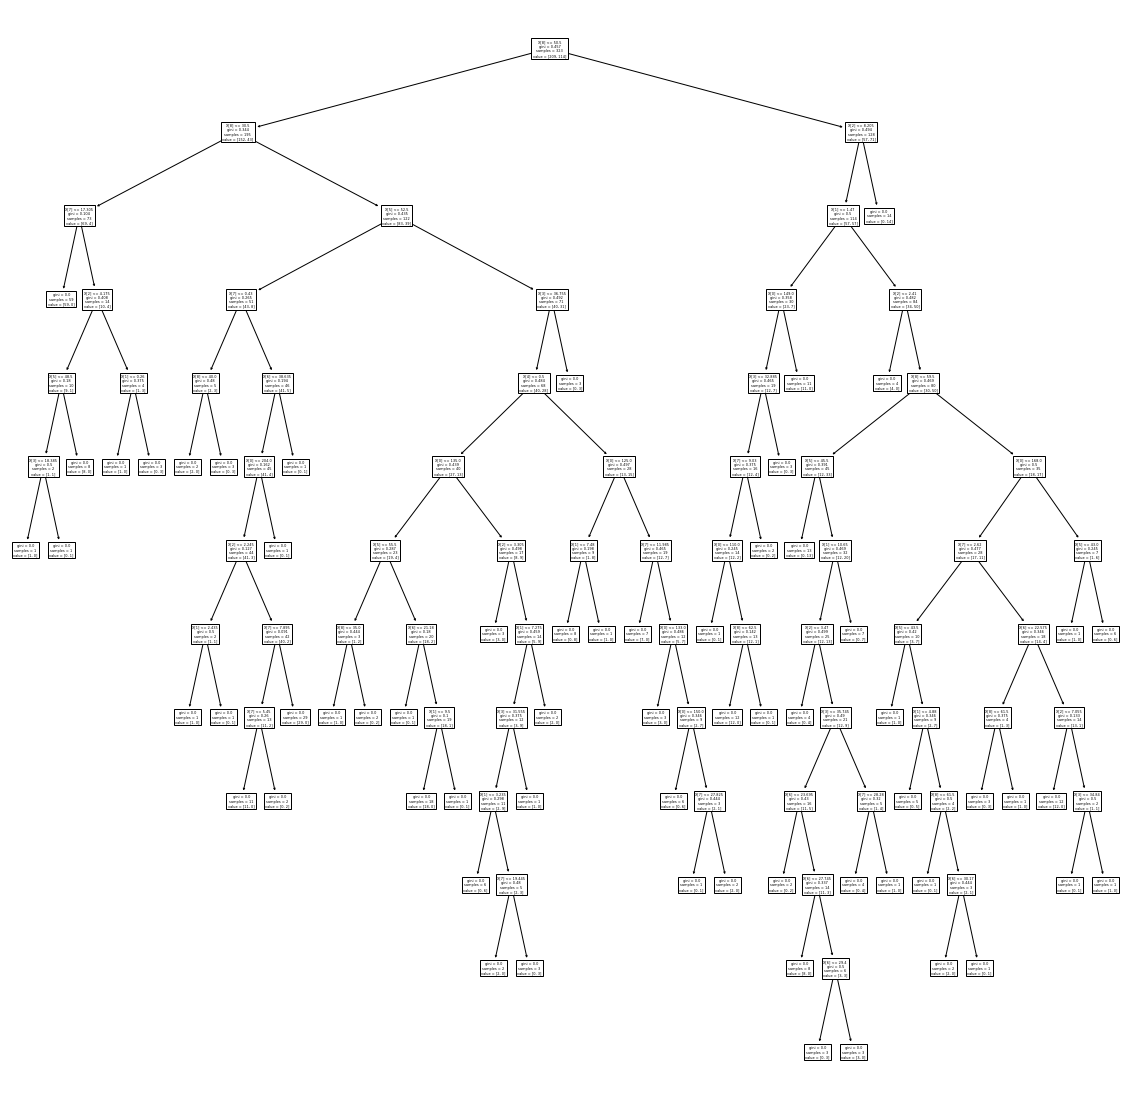

In [16]:
#Model plotting
plt.figure(figsize=(20,20))
tree.plot_tree(clf2)
plt.show()

## Hyperparameter Decision Tree DATASET2

In [17]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [2, 3, 5, 7, 9],
    'criterion': ["gini", "entropy"],
    'min_samples_split': [2, 3, 5, 7, 9]
}


scoring = ['accuracy','f1_macro','roc_auc', 'average_precision','recall' ]
grid_search = GridSearchCV(estimator=clf2, param_grid=params, cv=10, n_jobs=-1, scoring = scoring, verbose=3, refit='accuracy', return_train_score=True)

# grid_search = GridSearchCV(estimator=clf, param_grid=params, cv=10, n_jobs=-1, verbose=3, scoring = "accuracy")
grid_search.fit(X_train, y_train)
grid_pred = grid_search.predict(X_test)
score = roc_auc_score(y_test, grid_pred)

print(grid_search.best_estimator_)
print(grid_search.best_params_)
print("Accuracy ",grid_search.score(X_test, y_test))
print(classification_report(y_test, grid_pred))

print(f"ROC AUC: {score:.4f}")

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
[CV 2/10] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=9; accuracy: (train=0.986, test=0.925) average_precision: (train=0.999, test=0.855) f1_macro: (train=0.985, test=0.919) recall: (train=0.971, test=0.867) roc_auc: (train=1.000, test=0.913) total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=7; accuracy: (train=0.975, test=0.949) average_precision: (train=0.996, test=0.983) f1_macro: (train=0.973, test=0.946) recall: (train=0.963, test=0.933) roc_auc: (train=0.998, test=0.992) total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=7; accuracy: (train=0.981, test=0.949) average_precision: (train=0.996, test=0.979) f1_macro: (train=0.979, test=0.946) recall: (train=0.971, test=0.933) roc_auc: (train=0.998, test=0.989) total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=5, min_samples_

## 10-Fold Cross Validation Decision Tree DATASET2

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
    
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('\nList of possible accuracy:', scores)
print('\nMaximum Accuracy That can be obtained from this model is:', max(scores)*100, '%')
print('\nMinimum Accuracy:', min(scores)*100, '%')
print('\nOverall Accuracy:', (np.mean(scores)*100, '%'))
print('\nStandard Deviation is:', np.std(scores))

Fold:  1, Training/Test Split Distribution: [188 102], Accuracy: 0.545
Fold:  2, Training/Test Split Distribution: [188 102], Accuracy: 0.667
Fold:  3, Training/Test Split Distribution: [188 102], Accuracy: 0.545
Fold:  4, Training/Test Split Distribution: [188 103], Accuracy: 0.688
Fold:  5, Training/Test Split Distribution: [188 103], Accuracy: 0.719
Fold:  6, Training/Test Split Distribution: [188 103], Accuracy: 0.625
Fold:  7, Training/Test Split Distribution: [188 103], Accuracy: 0.469
Fold:  8, Training/Test Split Distribution: [188 103], Accuracy: 0.625
Fold:  9, Training/Test Split Distribution: [188 103], Accuracy: 0.438
Fold: 10, Training/Test Split Distribution: [189 102], Accuracy: 0.594


Cross-Validation accuracy: 0.591 +/- 0.087

List of possible accuracy: [0.5454545454545454, 0.6666666666666666, 0.5454545454545454, 0.6875, 0.71875, 0.625, 0.46875, 0.625, 0.4375, 0.59375]

Maximum Accuracy That can be obtained from this model is: 71.875 %

Minimum Accuracy: 43.75 %

Ove